## Dataset that details charges on medical insurance 
Includes several different kind of data columns affecting the charges. 
Let´s explore!

In [1]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')


Lets have a look at our data!

In [47]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [48]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [49]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box',
                   nbins=47,  
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


Well some kind of youth offer? Any other theories?

### Let's dig into BMI

In [8]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

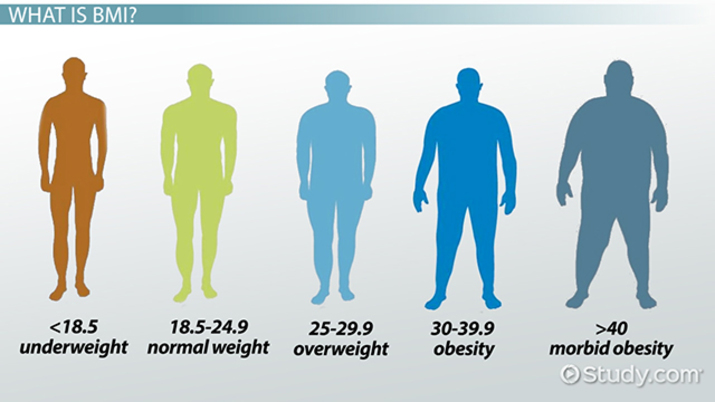

How about charges? There was quite a gap between mean and median.
Any other variables affecting that? BMI? Smoking? Let's check.

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smoking is expensive.

In [10]:
medical_df.smoker.value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

### Age and charges
Could age affect costs?

In [12]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker',
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

If we replace smoker with bmi?

In [13]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='bmi',
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

BMI, charges and smoker?

In [14]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## Correlation 
How well connected are two columns (growth in one leads to growth in another)

In [15]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

## This has some correlation.

In [16]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362878

How about smoking? It´s a categorical and needs some conversion:

In [51]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

Yeah, thats correlation. 
Correlation tells Strength between -1 and 1, where the middle 0 is no correlation and the absolute value is the strength.
Negative values tells us it´s a negative correlation. Smoking and life span could be one for example. Smoking correlates (I guess) with lower life expectancy.
Positive values is related the other way, when one increases, the other increases too.
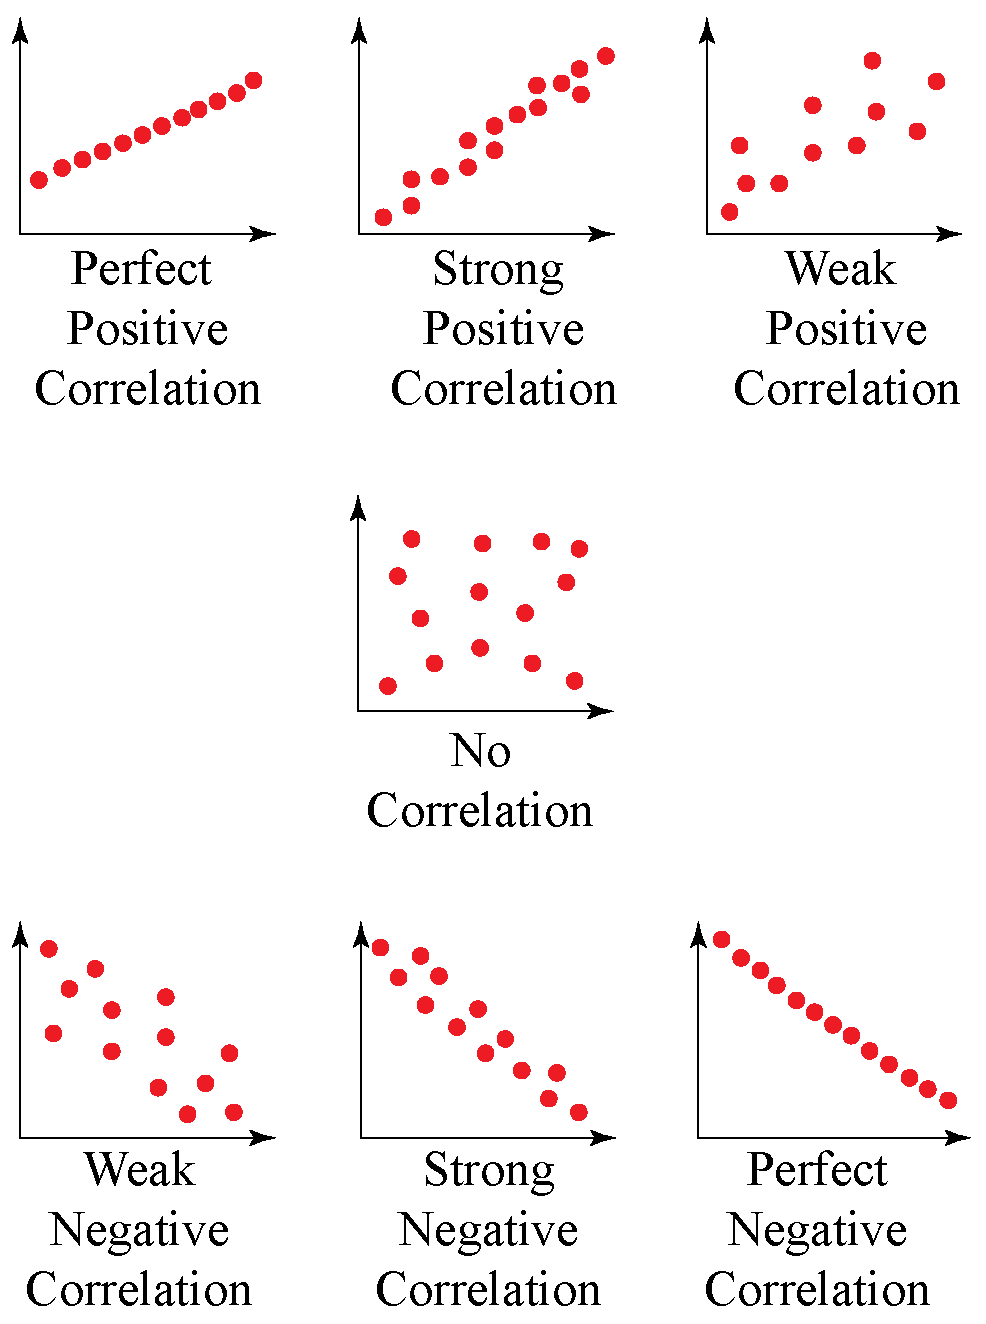

Pandas has a general correlation method. 

In [18]:
medical_df.corr(numeric_only=True)

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

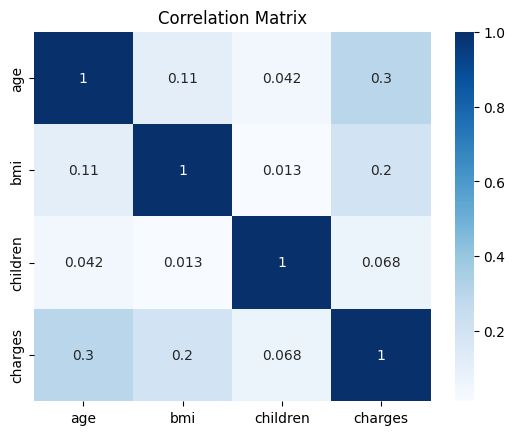

In [19]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

Correlation is not causation...

### Let's do some regression

In [20]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

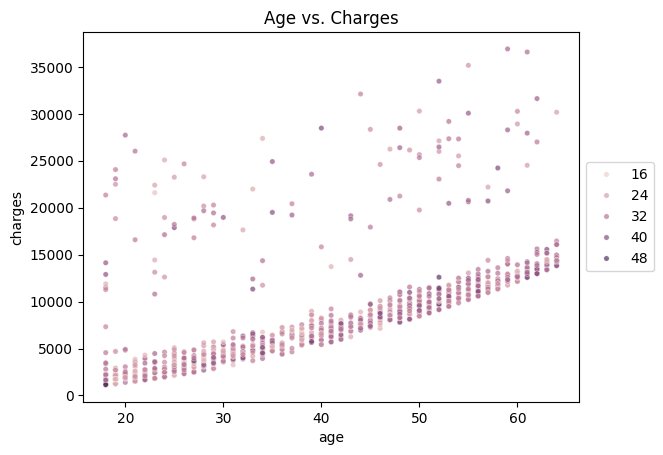

In [21]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', hue = 'bmi', alpha=0.7, s=15);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

It kind of looks like a line there...

$y=wx+b$

w is the slope, b is the intercept

Our model is: 

$ charges = w * age + b $

In [22]:
def estimate_charges(age, w, b):
    return w * age + b

Lets take a guess on w and b

$ w = 50 $ 

$ b= 100 $

In [52]:
w= 50 
b= 100

In [24]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

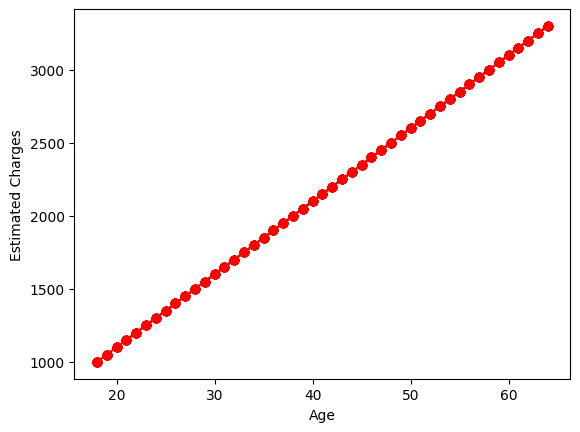

In [25]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

How does it fit with our data?

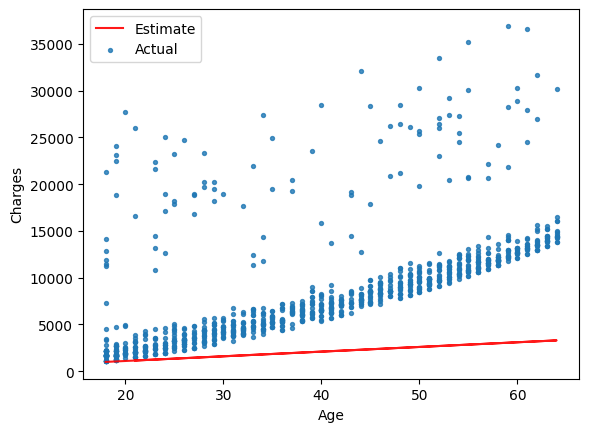

In [26]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [27]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

RMSE Loss:  4778.197917926803


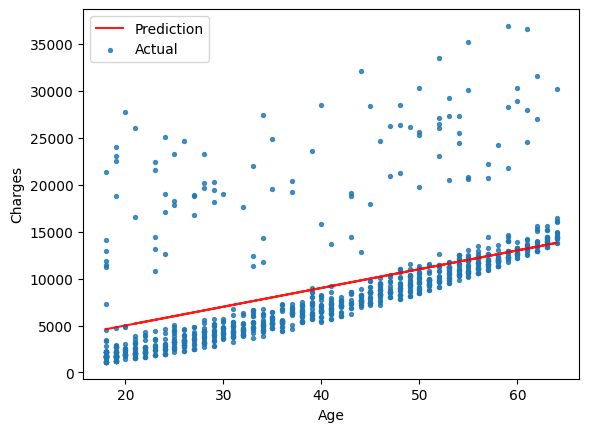

In [55]:
try_parameters(200, 1000)

RMSE Loss:  13304.516453537666


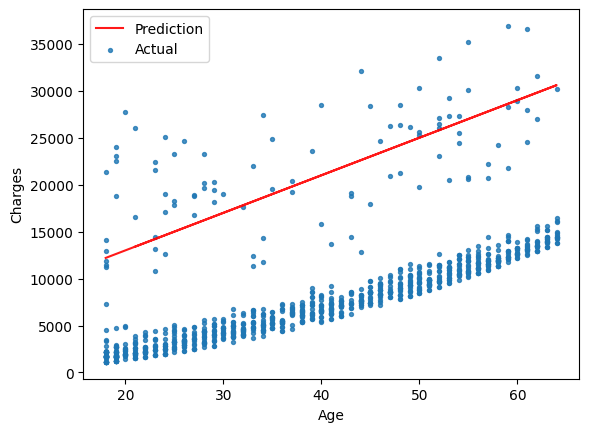

In [56]:
try_parameters(400, 5000)

This is better but still a bit boring, could we do this a bit more automated...
Two things needed:
1. We need to measure numerically how well the line fits the points.
2. We need a way to adjust *w* and *b* to improve the fit.

## Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

$ RMSE = \sqrt{\frac{\displaystyle\sum_{i=1}^N (Predicted_i-Actual_i)^2}{N}} $

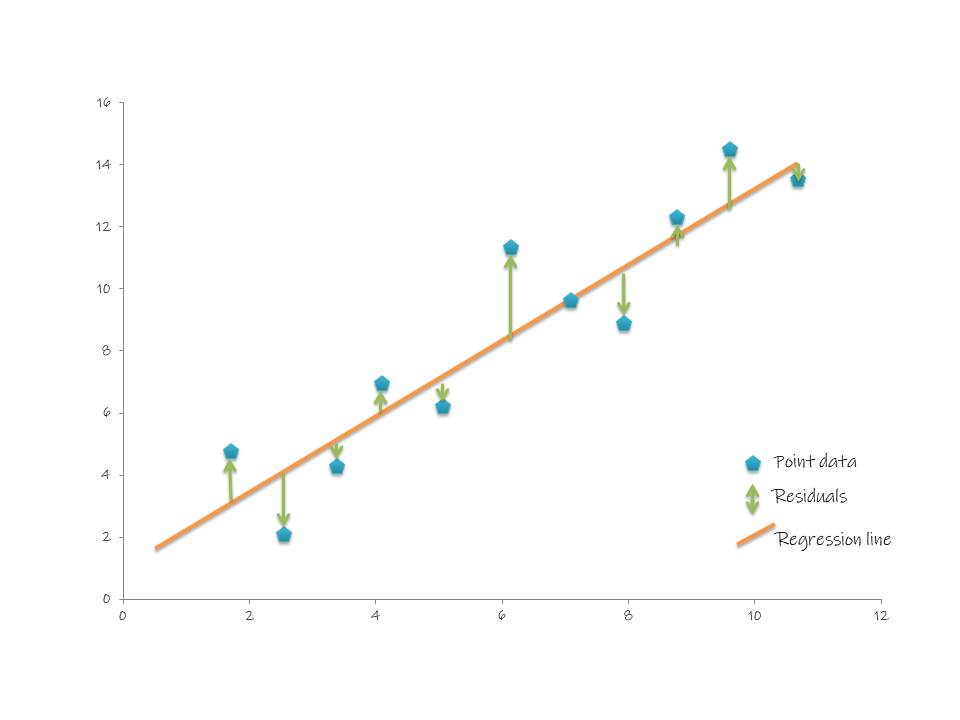




In [30]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's try it out with a sample $ w $ and $ b $

In [31]:
w = 50
b = 100

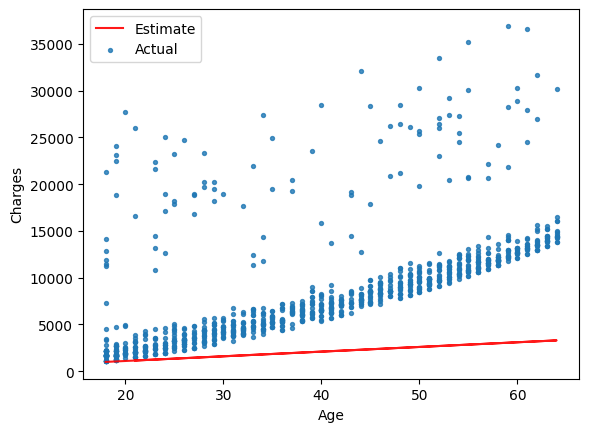

In [32]:
try_parameters(w,b)

In [33]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [34]:
rmse(targets, predicted)

8461.949562575493

On average our prediction differs $8461.949562575493$ from our target.
This is called loss and indicates how well or bad the model is predicting the variables in our target.

### Lower loss = better model 

We can include the loss in our method

In [35]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4907.571788102452


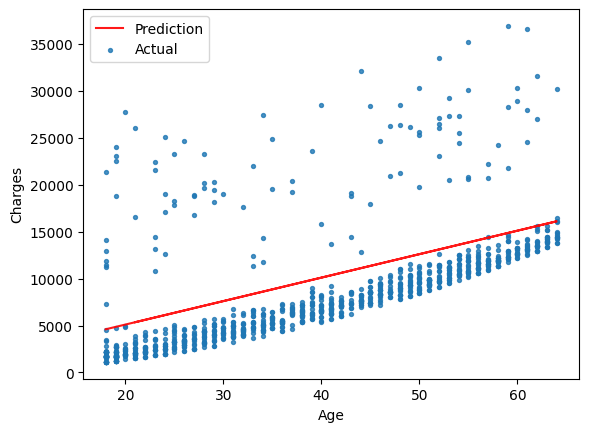

In [60]:
try_parameters(250,100)

How low loss can we get manually?

### Optimizer

Now it´s time for part two in our automation
Improving the fit (lessening loss) of our model.
Two main methods
* Ordinary least squares - better for smaller datasets [Ordinary least square](https://en.wikipedia.org/wiki/Ordinary_least_squares)
* Stochastic gradient descent - better for larger datasets - [Stochastic gradient descent](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)

The first one uses matrix operations to calculate the best w and b while the second one is iterative, essentially our manual method, automated with the help of derivate-functions

These are never implemented so here ends our journey into math. 

In [37]:
from sklearn.linear_model import LinearRegression
#Class import from module
model = LinearRegression()
#We instantiate an instance of the class.

In [38]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [61]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
# X and y
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)


inputs.shape : (1064, 1)
targes.shape : (1064,)


In [40]:
mymodel = model.fit(inputs.values, targets.values)
mymodel

LinearRegression()

In [41]:
mymodel.predict(np.array([[24],[53],[64],[117]]))

array([ 4322.55335138, 12072.77182349, 15012.50986463, 29176.70224469])

Is these predictions somewhat valid, let´s check the graph?

Ok, lets run our dataset and predict and check our loss.

In [42]:
predictions = model.predict(inputs.values)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [43]:
rmse(targets, predictions)

4662.505766636395

Better than my best guess! ~4700

In [44]:
model.coef_

array([267.24891283])

Not so bad Björn

In [45]:
model.intercept_

-2091.4205565650864

$ y = 267.25x -2091.42 $

RMSE Loss:  4662.505766636395


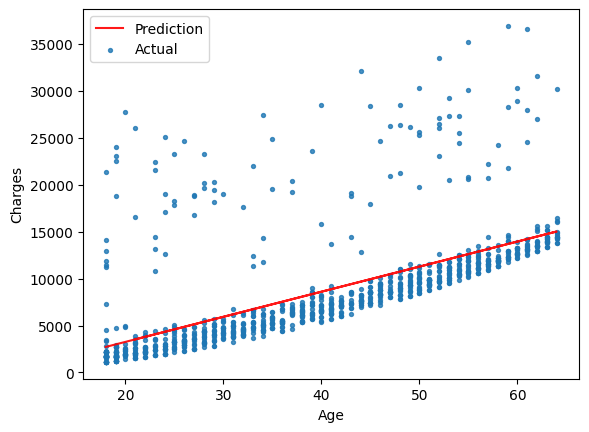

In [46]:
try_parameters(model.coef_, model.intercept_)

We now have our first machine learning model!
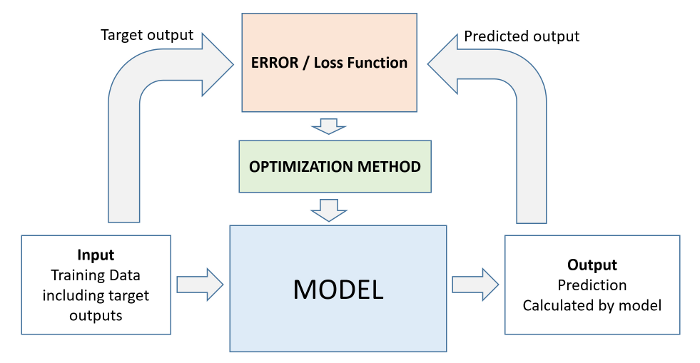